# Análisis de Datos de Fraude en Seguros de Auto / Redes Neuronales en R

# 2 Procesamiento de los Datos

# 2.1 Carga de Librerías

In [ ]:
# Instalamos Keras y Tensorflow

install.packages("keras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
install.packages("RANN")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("performanceEstimation")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘BBmisc’, ‘checkmate’, ‘parallelMap’




In [ ]:
# Cargamos las liberías a utilizar

library(dplyr)
library(keras)
library(caret)
library(RANN)
library(performanceEstimation)

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


# 2.2 Carga de Datos

In [ ]:
# Cargamos los datos
archivo <- "/content/sample_data/Dataset.csv"
car_fraud <- read.csv(archivo)
head(car_fraud)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,⋯,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,⋯,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069
2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,⋯,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.456
3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,⋯,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941
4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,⋯,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153
5,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,⋯,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374
6,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,⋯,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision,57166.761


In [ ]:
# Mostramos el número de filas y columnas
dim(car_fraud)

[1] 11565    34

# 2.3 División de los Datos

In [ ]:
# Dividimos los datos
dataframe <- select(car_fraud, -PolicyNumber) # quitamos la variable identidad
dim(dataframe)
X <- select(dataframe, -FraudFound_P) # quitamos la variable objetivo
dim(X)

[1] 11565    33

[1] 11565    32

#  2.4 Limpieza de Datos y Escalamiento de Variables

In [ ]:
# Mostramos la suma de valores nulos
sapply(X, function(x) sum(is.na(x)))

Month          WeekOfMonth            DayOfWeek 
                   0                    0                    0 
                Make         AccidentArea     DayOfWeekClaimed 
                   0                    0                    0 
        MonthClaimed   WeekOfMonthClaimed                  Sex 
                   0                    0                    0 
       MaritalStatus                  Age                Fault 
                   0                    5                    0 
          PolicyType      VehicleCategory         VehiclePrice 
                   0                    0                    0 
           RepNumber           Deductible         DriverRating 
                   0                    0                    6 
Days_Policy_Accident    Days_Policy_Claim   PastNumberOfClaims 
                   0                    0                    0 
        AgeOfVehicle    AgeOfPolicyHolder    PoliceReportFiled 
                   0                    0                    0 
      WitnessPresent            AgentType  NumberOfSuppliments 
                   0                    0                    0 
 AddressChange_Claim         NumberOfCars                 Year 
                   0                    0                    0 
          BasePolicy            ClaimSize 
                   0                    0

In [ ]:
# Mostramos la suma de valores cero
sapply(X, function(x) sum(x == 0, na.rm = TRUE))

Month          WeekOfMonth            DayOfWeek 
                   0                    0                    0 
                Make         AccidentArea     DayOfWeekClaimed 
                   0                    0                    1 
        MonthClaimed   WeekOfMonthClaimed                  Sex 
                   1                    0                    0 
       MaritalStatus                  Age                Fault 
                   0                  253                    0 
          PolicyType      VehicleCategory         VehiclePrice 
                   0                    0                    0 
           RepNumber           Deductible         DriverRating 
                   0                    0                    0 
Days_Policy_Accident    Days_Policy_Claim   PastNumberOfClaims 
                   0                    0                    0 
        AgeOfVehicle    AgeOfPolicyHolder    PoliceReportFiled 
                   0                    0                    0 
      WitnessPresent            AgentType  NumberOfSuppliments 
                   0                    0                    0 
 AddressChange_Claim         NumberOfCars                 Year 
                   0                    0                    0 
          BasePolicy            ClaimSize 
                   0                    6

In [ ]:
# Reemplazamos los valores iguales a cero por NA
X[X == 0] <- NA
sapply(X, function(x) sum(is.na(x)))

Month          WeekOfMonth            DayOfWeek 
                   0                    0                    0 
                Make         AccidentArea     DayOfWeekClaimed 
                   0                    0                    1 
        MonthClaimed   WeekOfMonthClaimed                  Sex 
                   1                    0                    0 
       MaritalStatus                  Age                Fault 
                   0                  258                    0 
          PolicyType      VehicleCategory         VehiclePrice 
                   0                    0                    0 
           RepNumber           Deductible         DriverRating 
                   0                    0                    6 
Days_Policy_Accident    Days_Policy_Claim   PastNumberOfClaims 
                   0                    0                    0 
        AgeOfVehicle    AgeOfPolicyHolder    PoliceReportFiled 
                   0                    0                    0 
      WitnessPresent            AgentType  NumberOfSuppliments 
                   0                    0                    0 
 AddressChange_Claim         NumberOfCars                 Year 
                   0                    0                    0 
          BasePolicy            ClaimSize 
                   0                    6

In [ ]:
# Imputamos los valores nulos con "knnImpute" y estandarizamos los datos númericos con "center" y "scale"
imputer <- preProcess(X, method = c("knnImpute"))
imputer

Created from 11295 samples and 32 variables

Pre-processing:
  - centered (8)
  - ignored (24)
  - 5 nearest neighbor imputation (8)
  - scaled (8)


In [ ]:
# Transformamos los valores nulos y transformamos los datos númericos a media = 0 y sd = 1
transformed <- predict(imputer, dataframe)
head(transformed)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,⋯,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,Dec,1.7247063,Wednesday,Honda,Urban,Tuesday,Jan,-1.3521144,Female,Single,⋯,26 to 30,No,No,External,none,1 year,3 to 4,-1.080042,Liability,1.2062718
2,Jan,0.1681097,Wednesday,Honda,Urban,Monday,Jan,1.0323325,Male,Single,⋯,31 to 35,Yes,No,External,none,no change,1 vehicle,-1.080042,Collision,1.3458895
3,Oct,1.7247063,Friday,Honda,Urban,Thursday,Nov,-0.5572987,Male,Married,⋯,41 to 50,No,No,External,none,no change,1 vehicle,-1.080042,Collision,1.8076213
4,Jun,-0.6101885,Saturday,Toyota,Rural,Friday,Jul,-1.3521144,Male,Married,⋯,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,-1.080042,Liability,-0.5699635
5,Feb,-1.3884868,Saturday,Honda,Urban,Monday,Feb,0.2375169,Male,Married,⋯,36 to 40,No,No,External,1 to 2,no change,1 vehicle,-1.080042,Collision,2.8001256
6,Dec,0.9464080,Saturday,Honda,Urban,Wednesday,Dec,1.8271481,Male,Single,⋯,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,-1.080042,Collision,1.2670590


In [ ]:
sapply(transformed, function(x) sum(is.na(x)))

Month          WeekOfMonth            DayOfWeek 
                   0                    0                    0 
                Make         AccidentArea     DayOfWeekClaimed 
                   0                    0                    0 
        MonthClaimed   WeekOfMonthClaimed                  Sex 
                   0                    0                    0 
       MaritalStatus                  Age                Fault 
                   0                    0                    0 
          PolicyType      VehicleCategory         VehiclePrice 
                   0                    0                    0 
        FraudFound_P            RepNumber           Deductible 
                   0                    0                    0 
        DriverRating Days_Policy_Accident    Days_Policy_Claim 
                   0                    0                    0 
  PastNumberOfClaims         AgeOfVehicle    AgeOfPolicyHolder 
                   0                    0                    0 
   PoliceReportFiled       WitnessPresent            AgentType 
                   0                    0                    0 
 NumberOfSuppliments  AddressChange_Claim         NumberOfCars 
                   0                    0                    0 
                Year           BasePolicy            ClaimSize 
                   0                    0                    0

# 2.5 Codificación de Datos Categóricos

In [ ]:
# Convertimos a factor las variables categóricas ordinales y nominales
transformed$FraudFound_P <- factor(transformed$FraudFound_P)
transformed$Month <- as.numeric(factor(transformed$Month,
                                      levels = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')))
transformed$DayOfWeek <- as.numeric(factor(transformed$DayOfWeek,
                                          levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')))
transformed$Make <- as.numeric(factor(transformed$Make,
                                      levels = c('Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW')))
transformed$AccidentArea <- as.numeric(factor(transformed$AccidentArea,
                                              levels = c('Rural', 'Urban')))
transformed$DayOfWeekClaimed <- as.numeric(factor(transformed$DayOfWeekClaimed,
                                                  levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')))
transformed$MonthClaimed <- as.numeric(factor(transformed$MonthClaimed,
                                              levels = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')))
transformed$Sex <- as.numeric(factor(transformed$Sex,
                                    levels = c('Male', 'Female')))
transformed$MaritalStatus <- as.numeric(factor(transformed$MaritalStatus,
                                              levels = c('Single', 'Married', 'Widow', 'Divorced')))
transformed$Fault <- as.numeric(factor(transformed$Fault,
                                      levels = c('Policy Holder', 'Third Party')))
transformed$PolicyType <- as.numeric(factor(transformed$PolicyType,
                                            levels = c('Sport - Liability', 'Sport - Collision', 'Sedan - Liability', 'Sedan - All Perils', 'Sedan - Collision', 'Utility - Collision', 'Utility - Liability', 'Utility - All Perils', 'Sport - All Perils'))) 
transformed$VehicleCategory <- as.numeric(factor(transformed$VehicleCategory,
                                                levels = c('Sport', 'Sedan', 'Utility')))
transformed$VehiclePrice <- as.numeric(factor(transformed$VehiclePrice,
                                              levels = c('less than 20000', '20000 to 29000', '30000 to 39000', '40000 to 59000', '60000 to 69000', 'more than 69000')))
transformed$Days_Policy_Accident <- as.numeric(factor(transformed$Days_Policy_Accident,
                                                      levels = c('none', '1 to 7', '8 to 15', '15 to 30', 'more than 30')))
transformed$Days_Policy_Claim <- as.numeric(factor(transformed$Days_Policy_Claim,
                                                  levels = c('none', '8 to 15', '15 to 30', 'more than 30')))
transformed$PastNumberOfClaims <- as.numeric(factor(transformed$PastNumberOfClaims,
                                                    levels = c('none', '1', '2 to 4', 'more than 4')))
transformed$AgeOfVehicle <- as.numeric(factor(transformed$AgeOfVehicle,
                                              levels = c('new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7')))
transformed$AgeOfPolicyHolder <- as.numeric(factor(transformed$AgeOfPolicyHolder,
                                                  levels = c('16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 65', 'over 65')))
transformed$PoliceReportFiled <- as.numeric(factor(transformed$PoliceReportFiled,
                                                  levels = c('No', 'Yes')))
transformed$WitnessPresent <- as.numeric(factor(transformed$WitnessPresent,
                                                levels = c('No', 'Yes')))
transformed$AgentType <- as.numeric(factor(transformed$AgentType,
                                          levels = c('External', 'Internal')))
transformed$NumberOfSuppliments <- as.numeric(factor(transformed$NumberOfSuppliments,
                                                    levels = c('none', '1 to 2', '3 to 5', 'more than 5')))
transformed$AddressChange_Claim <- as.numeric(factor(transformed$AddressChange_Claim,
                                                    levels = c('no change', 'under 6 months', '1 year', '2 to 3 years', '4 to 8 years')))
transformed$NumberOfCars <- as.numeric(factor(transformed$NumberOfCars,
                                              levels = c('1 vehicle', '2 vehicles', '3 to 4', '5 to 8', 'more than 9')))
transformed$BasePolicy <- as.numeric(factor(transformed$BasePolicy,
                                            levels = c('Liability', 'Collision', 'All Perils')))

str(transformed)

'data.frame':	11565 obs. of  33 variables:
 $ Month               : num  12 1 10 6 2 12 3 3 1 1 ...
 $ WeekOfMonth         : num  1.725 0.168 1.725 -0.61 -1.388 ...
 $ DayOfWeek           : num  3 3 5 6 6 6 7 1 5 5 ...
 $ Make                : num  7 7 7 18 7 7 10 7 6 7 ...
 $ AccidentArea        : num  2 2 2 1 2 2 2 2 2 1 ...
 $ DayOfWeekClaimed    : num  2 1 4 5 1 3 3 1 5 3 ...
 $ MonthClaimed        : num  1 1 11 7 2 12 3 3 1 2 ...
 $ WeekOfMonthClaimed  : num  -1.352 1.032 -0.557 -1.352 0.238 ...
 $ Sex                 : num  2 1 1 1 1 1 1 1 1 1 ...
 $ MaritalStatus       : num  1 1 2 2 2 1 1 2 2 1 ...
 $ Age                 : num  -1.603 -0.55 0.503 1.961 -0.388 ...
 $ Fault               : num  1 1 1 2 2 1 1 1 1 2 ...
 $ PolicyType          : num  1 2 2 3 2 2 4 3 3 5 ...
 $ VehicleCategory     : num  1 1 1 1 1 1 2 1 1 2 ...
 $ VehiclePrice        : num  6 6 6 2 6 6 6 2 6 6 ...
 $ FraudFound_P        : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ RepNumber           : nu

In [ ]:
sapply(transformed, function(x) sum(is.na(x)))

Month          WeekOfMonth            DayOfWeek 
                   0                    0                    0 
                Make         AccidentArea     DayOfWeekClaimed 
                   0                    0                    1 
        MonthClaimed   WeekOfMonthClaimed                  Sex 
                   1                    0                    0 
       MaritalStatus                  Age                Fault 
                   0                    0                    0 
          PolicyType      VehicleCategory         VehiclePrice 
                   0                    0                    0 
        FraudFound_P            RepNumber           Deductible 
                   0                    0                    0 
        DriverRating Days_Policy_Accident    Days_Policy_Claim 
                   0                    0                    0 
  PastNumberOfClaims         AgeOfVehicle    AgeOfPolicyHolder 
                   0                    0                    0 
   PoliceReportFiled       WitnessPresent            AgentType 
                   0                    0                    0 
 NumberOfSuppliments  AddressChange_Claim         NumberOfCars 
                   0                    0                    1 
                Year           BasePolicy            ClaimSize 
                   0                    0                    0

# 2.6 Sobremuestreo de los Datos

In [ ]:
# Aplicamos sobremuestreo para balancear la clase usando SMOTE
dataSMOTE <- smote(FraudFound_P~., data = transformed)
dim(dataSMOTE)

[1] 4795   33

In [ ]:
y <- dataSMOTE$FraudFound_P
cbind(Frecuencia = table(y), Porcentaje = prop.table(table(y))*100)

,Frecuencia,Porcentaje
0,2740,57.14286
1,2055,42.85714


In [ ]:
sapply(dataSMOTE, function(x) sum(is.na(x)))

Month          WeekOfMonth            DayOfWeek 
                   0                    0                    0 
                Make         AccidentArea     DayOfWeekClaimed 
                   0                    0                    0 
        MonthClaimed   WeekOfMonthClaimed                  Sex 
                   0                    0                    0 
       MaritalStatus                  Age                Fault 
                   0                    0                    0 
          PolicyType      VehicleCategory         VehiclePrice 
                   0                    0                    0 
        FraudFound_P            RepNumber           Deductible 
                   0                    0                    0 
        DriverRating Days_Policy_Accident    Days_Policy_Claim 
                   0                    0                    0 
  PastNumberOfClaims         AgeOfVehicle    AgeOfPolicyHolder 
                   0                    0                    0 
   PoliceReportFiled       WitnessPresent            AgentType 
                   0                    0                    0 
 NumberOfSuppliments  AddressChange_Claim         NumberOfCars 
                   0                    0                    0 
                Year           BasePolicy            ClaimSize 
                   0                    0                    0

# 2.7 Remuestreo de los Datos

In [ ]:
# Dividimos los datos en entrenamiento y prueba
trainIndex <- createDataPartition(dataSMOTE$FraudFound_P, p = 0.8, list = FALSE)
dataTrain <- dataSMOTE[trainIndex, ]
dim(dataTrain)
dataTest <- dataSMOTE[-trainIndex, ]
dim(dataTest)

[1] 3836   33

[1] 959  33

In [ ]:
# Dividimos los datos en X y y
X_train <- select(dataTrain, -FraudFound_P)
X_train <- as.matrix(X_train)
dim(X_train)
y_train <- as.numeric(as.matrix(dataTrain$FraudFound_P))
length(y_train)

X_test <- select(dataTest, -FraudFound_P)
X_test <- as.matrix(X_test)
dim(X_test)
y_test <- as.numeric(as.matrix(dataTest$FraudFound_P))
length(y_test)

[1] 3836   32

[1] 3836

[1] 959  32

[1] 959

# 3 Modelado

# 3.1 Red Secuencial

In [ ]:
# Definimos el modelo de capas con Keras relu - sigmoid (clasificación binaria)
model <- keras_model_sequential() %>%
  layer_dense(units = 16, activation = "relu", input_shape = ncol(X_train)) %>%
  layer_dense(units = 8, activation = "relu") %>%
  layer_dense(units = 1, activation = "sigmoid")

In [ ]:
# Compilamos el modelo Keras binary_crossentropy (clasificación binaria)
model %>% compile(
  optimizer = "adam",
  loss = "binary_crossentropy",
  metrics = c("accuracy")
)

In [ ]:
# Ajustamos el modelo Keras en los datos de entrenamiento y validamos con los datos de prueba
history <- model %>% fit(X_train, y_train, epochs = 150, batch_size = 16, validation_data = list(X_test, y_test))
history


Final epoch (plot to see history):
        loss: 0.3414
    accuracy: 0.8425
    val_loss: 0.418
val_accuracy: 0.806 

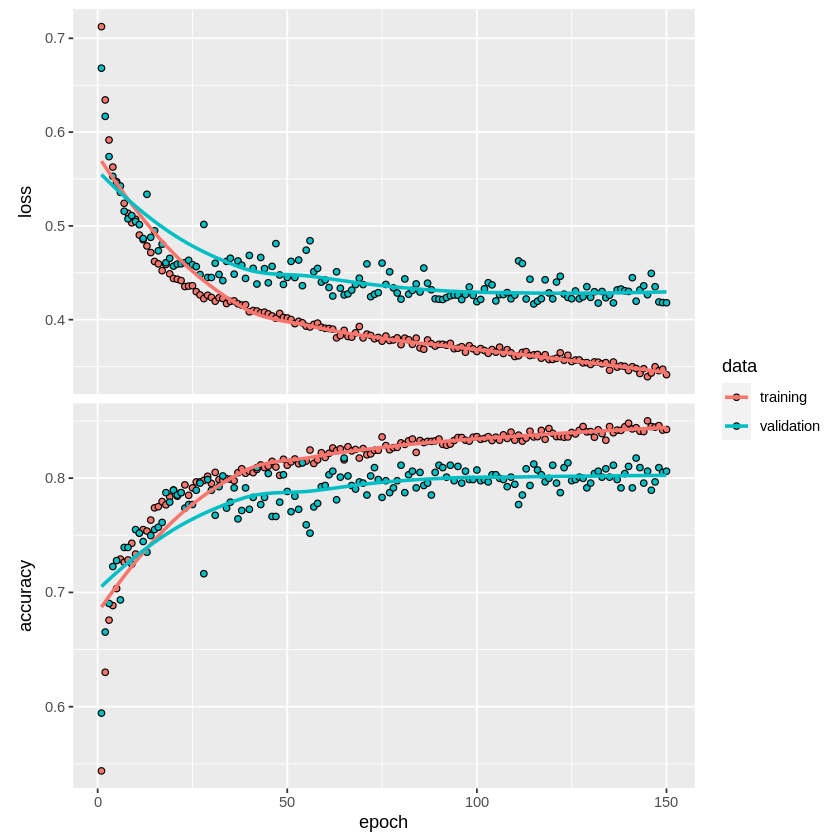

In [ ]:
plot(history)

In [ ]:
# Evaluamos el modelo Keras de los estimadores
metrics <- model %>% evaluate(X_train, y_train,)
metrics

loss  accuracy 
0.3329399 0.8514077

In [ ]:
# Hacemos predicciones sobre los datos de prueba
y_pred <- model %>% predict(X_test)
y_pred <- round(y_pred)
head(y_pred)

0
0
0
0
1
0


# 3.2 Evaluación del Modelo

In [ ]:
# Elaboramos la matriz de confusión de los predictores
confusionMatrix(as.factor(y_test), as.factor(y_pred))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 427 121
         1  65 346
                                          
               Accuracy : 0.806           
                 95% CI : (0.7796, 0.8306)
    No Information Rate : 0.513           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6106          
                                          
 Mcnemar's Test P-Value : 5.512e-05       
                                          
            Sensitivity : 0.8679          
            Specificity : 0.7409          
         Pos Pred Value : 0.7792          
         Neg Pred Value : 0.8418          
             Prevalence : 0.5130          
         Detection Rate : 0.4453          
   Detection Prevalence : 0.5714          
      Balanced Accuracy : 0.8044          
                                          
       'Positive' Class : 0               
                              